# Zadanie 06 (a)
---
#### Wykorzystując procedurę iteracyjną rozwiąż równanie opisujące rozkład temperatury wzdłuż pręta z uwzględnieniem wypromieniowywania ciepła

$$\frac{d^2 T}{dx^2} - \frac{h_c P}{k A_c} (T-T_s) - \frac{\epsilon \sigma P}{k A_c} (T^4-T_s^4) = 0$$

#### dla $0 \leq x \leq L$ przyjmując następujące wartości stałych: 

+ $h_c = 40 ~ \frac{W}{m^2 K}$
+ $P = 0.016~m $
+ $k = 240~\frac{W}{m K} $
+ $A_c = 1.6 \cdot 10^{-5}~m^2 $
+ $L = 0.3~m $
+ $T(0) = 473~K $
+ $T(L) = 293~K $
+ $T_s =293~K$ 
+ $\sigma = 5.67 \cdot 10^{-8}~\frac{W}{m^2 K^4}$
+ $\epsilon = 0.3$.

**Punktacja**
+ zaimplementowanie układu **1p.**
+ rozwiązanie zagadnienia wykorzystując procedurę iteracyjną **3p.**
+ przedstawienie wyników na wykresie **1p.**

## Teoria
---

### Metoda iteracyjna
Układ dany wzorem 

$$\mathbf{A} y + \Phi = b$$

gdzie $\mathbf{A}$ to macierz współczynników, $\Phi$ to wektor nieliniowych wyrazów będących funkcją niewiadomych $y_i$ a $b$ to wektor znanych wielkości stałych. Można przedstawić jako

$$\mathbf{A} y^{k+1} = b - \Phi^k$$

stąd jeżeli możliwe jest obliczenie macierzy odwrotnej $\mathbf{A}^{-1}$

$$y^{k+1} = \mathbf{A}^{-1}(b - \Phi^k)$$

### Rozkład temperatury wzdłuż pręta

Rozkład temparatury wzdłuż pręta z uwzględnieniem wypromieniowywania ciepła opisany jest wzorem

$$\frac{d^2 T}{dx^2} - \frac{h_c P}{k A_c} (T-T_s) - \frac{\epsilon \sigma P}{k A_c} (T^4-T_s^4) = 0$$

Stosując trzypunktową różnice zwykłą

$$\frac{d^2 T}{dx^2} - \beta_a (T-T_s) - \beta_b (T^4-T_s^4) = 0 \longrightarrow \frac{T_{i-1}-2T_i+T_{i+1}}{h^2} - \beta_a (T_i-T_s) - \beta_b (T_i^4-T_s^4) = 0$$

po przekształceniu

$$T_{i-1}-(2+h^2\beta_a)T_i - h^2\beta_b T_i^4 + T_{i+1} = - h^2(\beta_a T_s + \beta_b T_s^4)$$

Dzieląc pret na przykład na $N=5$ odcinków można zapisać równanie w postaci macierzowej

$$ \left[\begin{array}{cccc} -(2+h^2\beta_a) & 1 & 0 & 0 \\  1 & -(2+h^2\beta_a) & 1 & 0 \\ 0 & 1 & -(2+h^2\beta_a) & 1 \\ 0 & 0 & 1 & -(2+h^2\beta_a) \end{array}\right] \cdot \left[\begin{array}{c} T_{2} \\ T_{3} \\ T_{4} \\ T_{5} \end{array}\right] + \left[\begin{array}{c} - h^2 \beta_b T^4_{2} \\ - h^2 \beta_b T^4_{3} \\ - h^2 \beta_b T^4_{4} \\ - h^2 \beta_b T^4_{5} \end{array}\right] = \left[\begin{array}{c} -h^2 (\beta_a T_s + \beta_b T^4_s) - T_1 \\ -h^2 (\beta_a T_s + \beta_b T^4_s) \\ -h^2 (\beta_a T_s + \beta_b T^4_s) \\ -h^2 (\beta_a T_s + \beta_b T^4_s) - T_6 \end{array}\right]$$

gdzie $T_1 = T(0)$ a $T_6 = T(L)$


## Wykonanie
---
Wczytanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Przypisanie wartości sałym z równania

In [2]:
hc = 40
P  = 0.016
k  = 240
Ac = 1.6e-5

sigma = 5.67e-8

ba = hc*P/(k*Ac)
bb = 0.3*sigma*P/(k*Ac)

L  = 0.3

T0 = 473
Tk = 293
Ts = 293

Implementacja funkcji tworzacej układ

In [4]:
def system(L, T0, Tk, Ts, ba, bb, N = 5):

    h = L/N
    A = [[0 for col in range (4)] for row in range (4)]
    
    for i  in range (4):
        A[i][i] = -(2+h*h*ba)
        
    A[0][1] = 1
    A[1][0] = 1
    A[2][1] = 1
    A[1][2] = 1
    A[3][2] = 1
    A[2][3] = 1
    
    B = []
    B.append(-h*h*(ba*Ts+bb*Ts**4)-T0)
    B.append(-h*h*(ba*Ts+bb*Ts**4))
    B.append(-h*h*(ba*Ts+bb*Ts**4))
    B.append(-h*h*(ba*Ts+bb*Ts*4)-Tk)
    
    Pf = lambda T: -bb*np.power(T,4)*h**2 # to co dodajemy do lwej strony rownania
    
    A=np.array(A)
    
    return A, Pf, B

Obliczenia macierzy

In [5]:
A, Pf, B = system(L,T0,Tk,Ts,ba,bb, N=5)

Sprawdzenie poprawności

In [6]:
print(np.isclose(np.linalg.det(A), 26.4176))
print(np.linalg.det(A))

True
26.4176


Implementacja funkcji realizujące algorytm Thomasa

In [65]:
def iteration(A, Pf, B, T0):
    
    Aodw =np.linalg.inv(A)
    T = []
    T = T0
  
    for i in range(4):
        T = (Aodw@(B-Pf(T)))
        
    
    T = np.hstack((T0, T))
    T = np.hstack((T, Tk))
        
    return T
T

array([ 473.        ,  375.45565625,  330.57381163,  309.40217052,
        298.52919137])

Obliczenia rozkładu temperatury

In [71]:
T = iteration(A,Pf,B,T0)

X = np.linspace(0,L,6)
X


array([ 0.  ,  0.06,  0.12,  0.18,  0.24,  0.3 ])

Prezentacja wyniku na wykresie

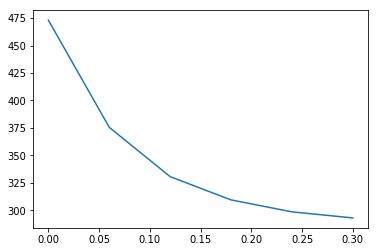

In [72]:
plt.plot(X, T)
plt.show()